# Exercise 3 - Solving Differential Equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from matplotlib import rcParams
% matplotlib inline

rcParams.update({'font.size': 25})


## Forward Euler

In [2]:
v0 = -4
t0 = -4.5

def f(V,t):
    return 1 - V - t

def euler(v0, t0, f, dt, T):
    t = np.linspace(t0, T, int((T-t0)/(dt)))
    V = np.zeros(len(t))
    V[0] = v0
    for i in np.arange(1, len(t)):
        V[i] = V[i-1] + f(V[i-1], t[i-1])* dt
        
    return V, t

In [3]:
V0, T0 = euler(v0, t0, f, 1, 5)
V1, T1 = euler(v0, t0, f, 0.5, 5)
V2, T2 = euler(v0, t0, f, 0.1, 5)
V3, T3 = euler(v0, t0, f, 0.012, 5)
T0

array([-4.5   , -3.3125, -2.125 , -0.9375,  0.25  ,  1.4375,  2.625 ,
        3.8125,  5.    ])

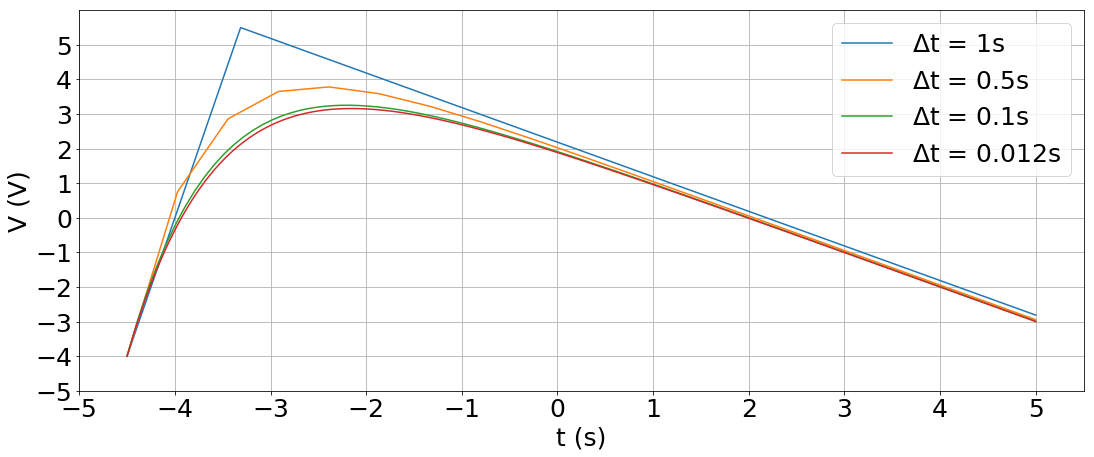

In [4]:
fig, ax = plt.subplots(figsize=(18, 7));
ax.set_ylabel('V (V)')
ax.set_xlabel('t (s)')
ax.grid()
ax.set_xlim(-5, 5.5)
ax.set_ylim(-5, 6)

plt.yticks(np.arange(-5, 6, 1));
plt.xticks(np.arange(-5, 6, 1));

l0, = plt.plot(T0, V0, label='$\Delta$t = 1s')
l1, = plt.plot(T1, V1, label='$\Delta$t = 0.5s')
l2, = plt.plot(T2, V2, label='$\Delta$t = 0.1s')
l3, = plt.plot(T3, V3, label='$\Delta$t = 0.012s')

plt.legend(loc=1, handles=[l0, l1, l2, l3])

plt.savefig('report/1_1.png', dpi=200, transparent=True)

## Heun Method
modified Euler, has an additional intermediete state

In [5]:
def heun(v0, t0, f, dt, T):
    t = np.linspace(t0, T, int((T-t0)/(dt)))
    V = np.zeros(len(t))
    V[0] = v0
    for i in np.arange(1, len(t)):
        A = f(V[i-1], t[i-1])
        Vp = V[i-1] + A * dt
        B = f(Vp, t[i])
        V[i] = V[i-1] + (A+B)/2 * dt
        
    return V, t

In [6]:
hV0, T0 = heun(v0, t0, f, 1, 5)
hV1, T1 = heun(v0, t0, f, 0.5, 5)
hV2, T2 = heun(v0, t0, f, 0.1, 5)
hV3, T3 = heun(v0, t0, f, 0.012, 5)

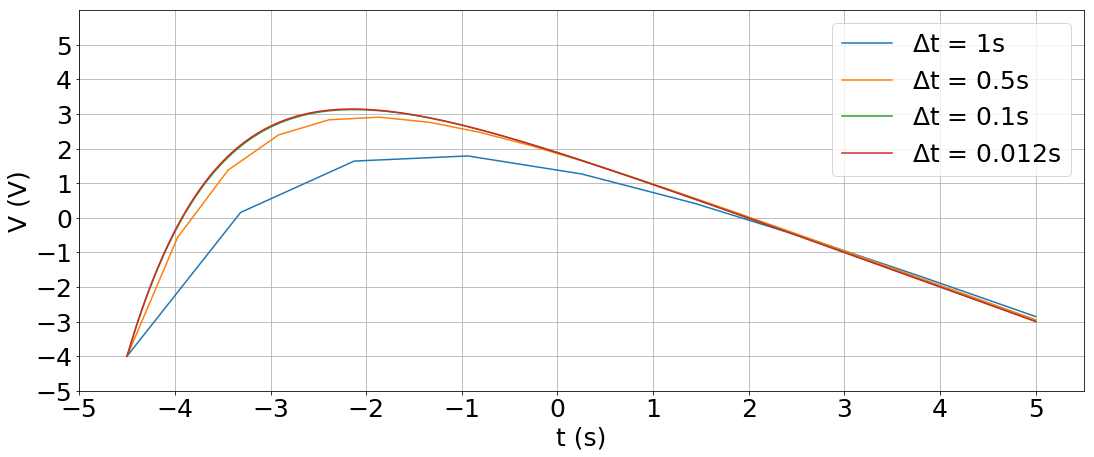

In [7]:
fig, ax = plt.subplots(figsize=(18, 7));
ax.set_ylabel('V (V)')
ax.set_xlabel('t (s)')
ax.grid()
ax.set_xlim(-5, 5.5)
ax.set_ylim(-5, 6)

plt.yticks(np.arange(-5, 6, 1));
plt.xticks(np.arange(-5, 6, 1));

l0, = plt.plot(T0, hV0, label='$\Delta$t = 1s')
l1, = plt.plot(T1, hV1, label='$\Delta$t = 0.5s')
l2, = plt.plot(T2, hV2, label='$\Delta$t = 0.1s')
l3, = plt.plot(T3, hV3, label='$\Delta$t = 0.012s')

plt.legend(loc=1, handles=[l0, l1, l2, l3])
plt.savefig('report/1_2.png', dpi=200)

## Exponential Euler

In [8]:
def exp_euler(v0, t0, f, dt, T):
#     f = A(t) V(t) + (B(V,t))
#     f = 1 - V - t
    t = np.linspace(t0, T, int((T-t0)/(dt)))
    V = np.zeros(len(t))
    V[0] = v0
    for i in np.arange(1, len(t)):
        A = -1
        B = 1 - t[i-1]
        V[i] = V[i-1] * np.exp(A*dt) + B/A * (np.exp(A*dt) - 1) 
        
    return V, t

In [9]:
eV0, T0 = exp_euler(v0, t0, f, 1, 5)
eV1, T1 = exp_euler(v0, t0, f, 0.5, 5)
eV2, T2 = exp_euler(v0, t0, f, 0.1, 5)
eV3, T3 = exp_euler(v0, t0, f, 0.012, 5)

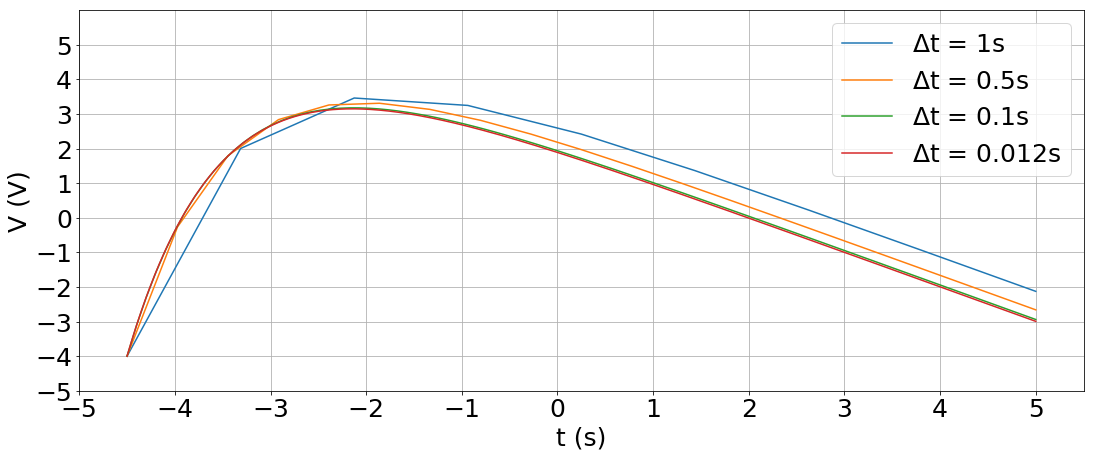

In [10]:
fig, ax = plt.subplots(figsize=(18, 7));
ax.set_ylabel('V (V)')
ax.set_xlabel('t (s)')
ax.grid()
ax.set_xlim(-5, 5.5)
ax.set_ylim(-5, 6)

plt.yticks(np.arange(-5, 6, 1));
plt.xticks(np.arange(-5, 6, 1));

l0, = plt.plot(T0, eV0, label='$\Delta$t = 1s')
l1, = plt.plot(T1, eV1, label='$\Delta$t = 0.5s')
l2, = plt.plot(T2, eV2, label='$\Delta$t = 0.1s')
l3, = plt.plot(T3, eV3, label='$\Delta$t = 0.012s')

plt.legend(loc=1, handles=[l0, l1, l2, l3])
plt.savefig('report/1_3.png', dpi=200)

## The Leaky Integrate and Fire Neuron

### Model for constant currents

In [11]:
def LIF(T, dt, I):
    Cm = 1e-6
    g_leak = 100e-6
    V_rest  = -60e-3
    V_thr   = -20e-3
    V_spike = 20e-3

    t = np.linspace(0, T, int(T/dt))
    V = np.zeros(len(t))
    V[0] = V_rest

    for n in np.arange(0, len(t)-1):
        if   (V[n] < V_thr):
            V[n+1] = V[n] + dt/Cm * (-g_leak * (V[n] - V_rest) + I)
        elif (V[n] == V_spike):
            V[n+1] = V_rest
        elif (V[n] >= V_thr):
            V[n+1] = V_spike

            
    return V, t

## Input Current of 10uA

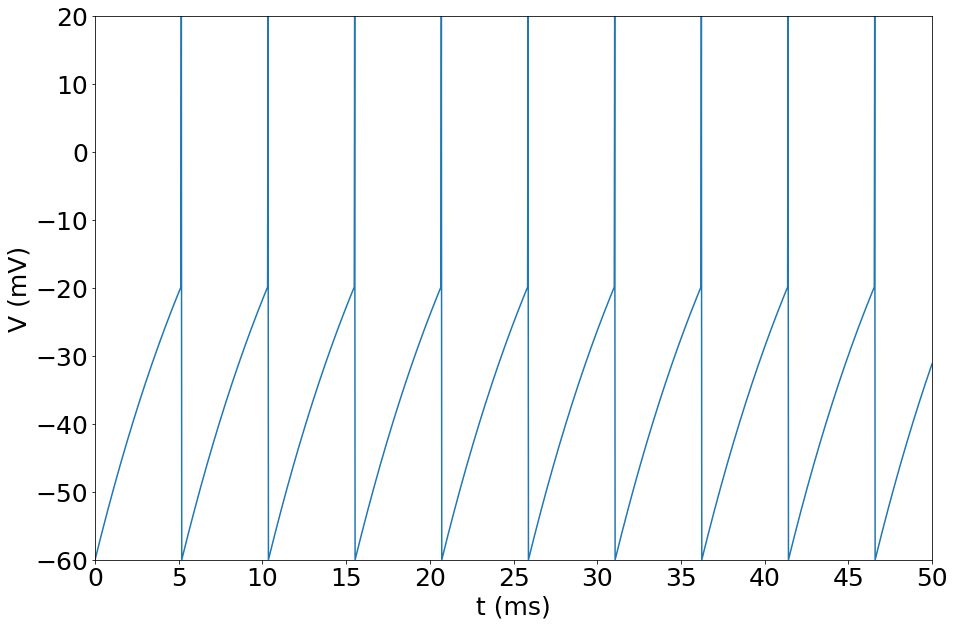

In [12]:
I = 10e-6
T= 50e-3
dt = 25e-6

Vl, tl = LIF(T, dt, I)
tl_10 = tl*1e3
Vl_10 = Vl*1e3

fig, ax = plt.subplots(figsize=(15, 10));
ax.set_ylabel('V (mV)')
ax.set_xlabel('t (ms)')
# ax.grid()
ax.set_xlim(0, 50)
ax.set_ylim(-60, 20)
plt.xticks(np.arange(0, 51, 5));
# plt.xticks(np.arange(-60, 20, 10));

plt.plot(tl_10, Vl_10);
plt.savefig('report/3_1.png', dpi=200)

## Input Current of 20 uA

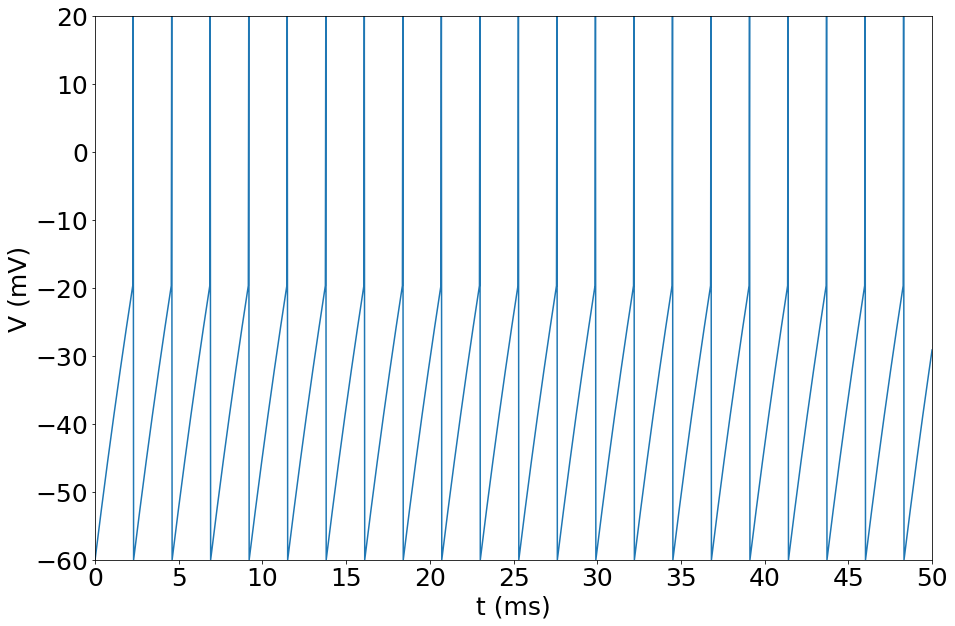

In [13]:
I = 20e-6
T= 50e-3
dt = 25e-6
Vl2, tl2 = LIF(T, dt, I)
Vl2_10, tl2_10 = Vl2*1e3, tl2*1e3
fig, ax = plt.subplots(figsize=(15, 10));
ax.set_ylabel('V (mV)')
ax.set_xlabel('t (ms)')
# ax.grid()

ax.set_xlim(0, 50)
ax.set_ylim(-60, 20)
plt.xticks(np.arange(0, 51, 5));
# plt.xticks(np.arange(-60, 20, 10));


plt.plot(tl2_10, Vl2_10);
plt.savefig('report/3_2.png', dpi=200)

## Rectified Sine-Input 

In [14]:
def sin_rect(f, dt, T, A):
    w = 2. * np.pi * f
    t = np.linspace(0, T, int(T/dt))
    s = np.abs(A * np.sin(w*t))

    return s, t

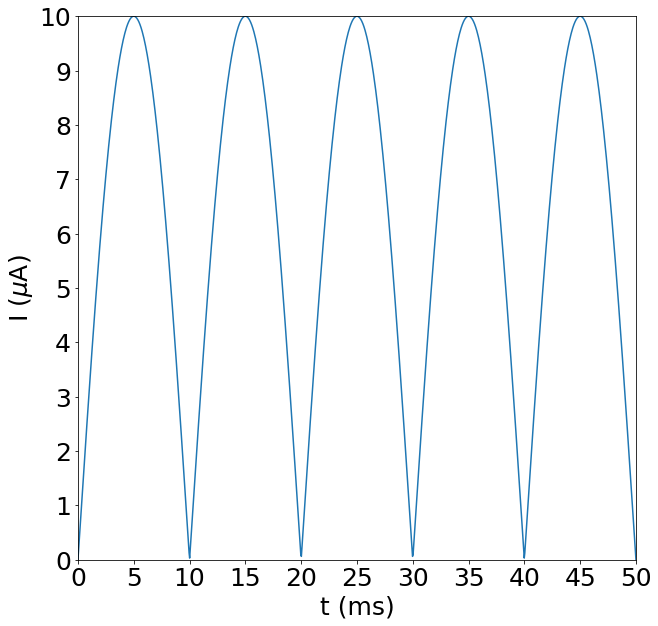

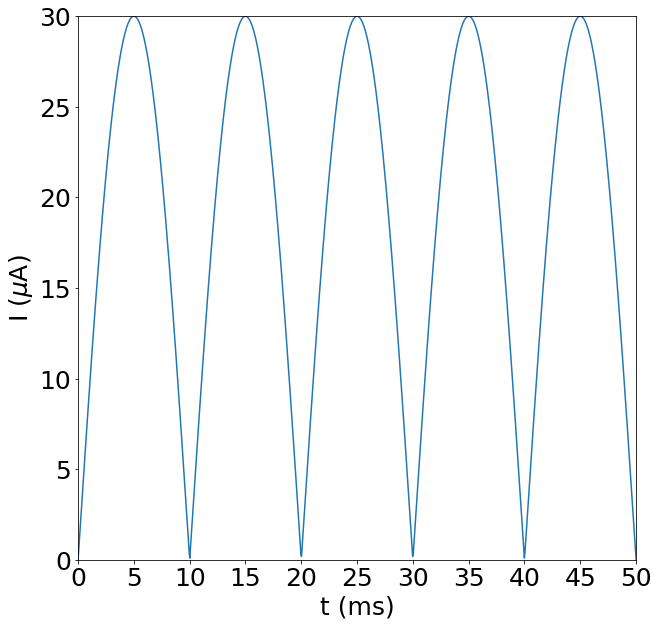

In [15]:
T= 50
dt = 0.05
f = 50
s, t = sin_rect(f, dt, T, 10)
s2, t2 = sin_rect(f, dt, T, 30)

fig, ax = plt.subplots(figsize=(10, 10));
ax.set_ylabel('I ($\mu$A)')
ax.set_xlabel('t (ms)')
# ax.grid()
ax.set_xlim(0, 50)
ax.set_ylim(0, 10)
plt.xticks(np.arange(0, 51, 5));
plt.yticks(np.arange(0, 11, 1));

plt.plot(t, s);
plt.savefig('report/2.png', dpi=200)

fig, ax = plt.subplots(figsize=(10, 10));
ax.set_ylabel('I ($\mu$A)')
ax.set_xlabel('t (ms)')
ax.set_xlim(0, 50)
ax.set_ylim(0, 30)
plt.xticks(np.arange(0, 51, 5));
plt.yticks(np.arange(0, 31, 5));

# ax.grid()
plt.plot(t2, s2);
plt.savefig('report/2_1.png', dpi=200)

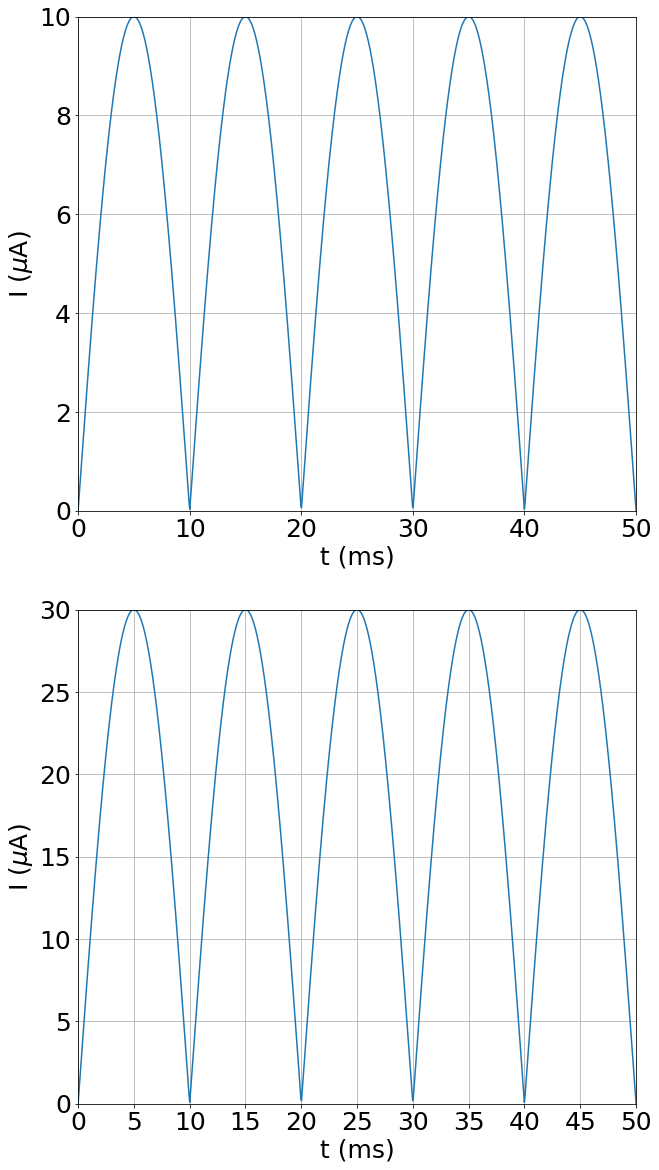

In [16]:
T= 50
dt = 0.05
f = 50
s, t = sin_rect(f, dt, T, 10)
s2, t2 = sin_rect(f, dt, T, 30)

fig, ax = plt.subplots(2, figsize=(10, 20));
ax[0].set_ylabel('I ($\mu$A)')
ax[0].set_xlabel('t (ms)')
ax[0].grid()
ax[0].set_xlim(0, 50)
ax[0].set_ylim(0, 10)

plt.xticks(np.arange(0, 51, 5));
ax[0].plot(t, s);
plt.yticks(np.arange(0, 11, 1));

ax[1].set_ylabel('I ($\mu$A)')
ax[1].set_xlabel('t (ms)')
ax[1].set_xlim(0, 50)
ax[1].set_ylim(0, 30)


ax[1].grid()
ax[1].plot(t2, s2);
plt.yticks(np.arange(0, 31, 5));
plt.xticks(np.arange(0, 51, 5));


## Applying rectified sine to the LIF 

### Model adaptation

In [17]:
def LIFsin(T, dt, Isin):
    Cm = 1e-6
    g_leak = 100e-6
    V_rest  = -60e-3
    V_thr   = -20e-3
    V_spike = 20e-3

    t = np.linspace(0, T, int(T/dt))
    V = np.zeros(len(Isin))
    V[0] = V_rest

    for n in np.arange(0, len(Isin)-1):
        if   (V[n] < V_thr):
            V[n+1] = V[n] + dt/Cm * (-g_leak * (V[n] - V_rest) + Isin[n]*10e-7)
        elif (V[n] == V_spike):
            V[n+1] = V_rest
        elif (V[n] >= V_thr):
            V[n+1] = V_spike

    return V, t


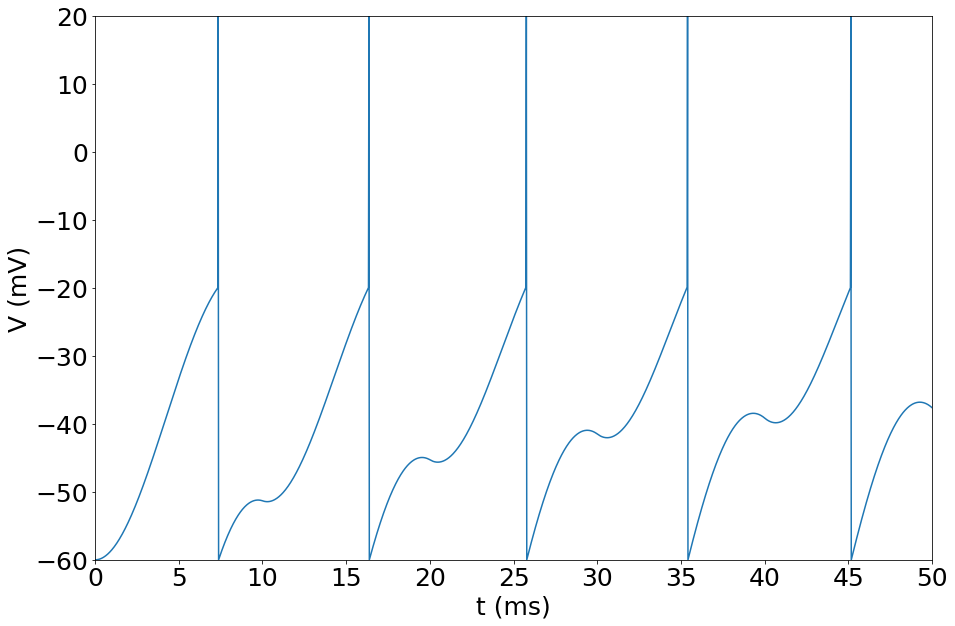

In [18]:
T= 50e-3
dt = 25e-6

Isin10, t2 = sin_rect(f, dt, T, 10)
V_sin, t_sin = LIFsin(T, dt, Isin10)

V_sin_10, t_sin_10 = V_sin*1e3, t_sin*1e3

fig, ax = plt.subplots(figsize=(15, 10));
ax.set_ylabel('V (mV)')
ax.set_xlabel('t (ms)')
# ax.grid()
ax.set_xlim(0, 50)
ax.set_ylim(-60, 20)
plt.xticks(np.arange(0, 51, 5));
# plt.xticks(np.arange(-60, 20, 10));

plt.plot(t_sin_10, V_sin_10);
plt.savefig('report/3_3.png', dpi=200)

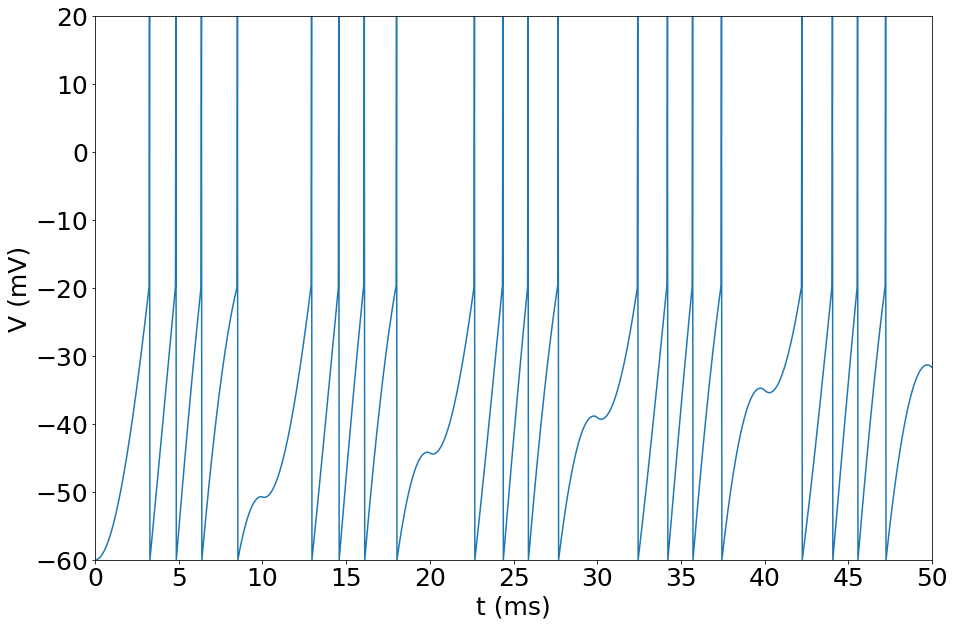

In [19]:
T= 50e-3
dt = 25e-6

Isin30, t2 = sin_rect(f, dt, T, 30)
V_sin30, t_sin = LIFsin(T, dt, Isin30)

V_sin30_10, t_sin_10 = V_sin30*1e3, t_sin*1e3

fig, ax = plt.subplots(figsize=(15, 10));
ax.set_ylabel('V (mV)')
ax.set_xlabel('t (ms)')
# ax.grid()
ax.set_xlim(0, 50)
ax.set_ylim(-60, 20)
plt.xticks(np.arange(0, 51, 5));
# plt.xticks(np.arange(-60, 20, 10));

plt.plot(t_sin_10, V_sin30_10);
plt.savefig('report/3_4.png', dpi=200)